In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib





# Example 2: Extracellular response of synaptic input
This is an example of **``LFPy``** running in an **``IPython notebook``**. To run through this example code and produce output, press **``<shift-Enter>``** in each code block below.

First step is to **import ``LFPy``** and other packages for analysis and plotting:

In [2]:
import LFPy

Create some dictionarys with parameters for cell, synapse and extracellular electrode:

In [3]:
cellParameters = {
    'morphology' : 'morphologies/L5_Mainen96_LFPy.hoc',
    'tstart' : -50,
    'tstop' : 100,
    'dt' : 2**-4,
    'passive' : True,
}

synapseParameters = {
    'syntype' : 'Exp2Syn',
    'e' : 0.,
    'tau1' : 0.5,
    'tau2' : 2.0,
    'weight' : 0.005,
    'record_current' : True,
}

z = mgrid[-400:1201:100]
electrodeParameters = {
    'x' : zeros(z.size),
    'y' : zeros(z.size),
    'z' : z,
    'sigma' : 0.3,
}

Then, create the **cell**, **synapse** and **electrode** objects using 
**LFPy.Cell**, **LFPy.Synapse**, **LFPy.RecExtElectrode**.

In [4]:
cell = LFPy.Cell(**cellParameters)
cell.set_pos(x=-10, y=0, z=0)
cell.set_rotation(z=np.pi)

synapse = LFPy.Synapse(cell,
                       idx = cell.get_closest_idx(z=800),
                       **synapseParameters)
synapse.set_spike_times(array([10, 30, 50]))
                        
electrode = LFPy.RecExtElectrode(**electrodeParameters)

Run the simulation with **electrode** as input to **cell.simulate()**

In [5]:
cell.simulate(electrode = electrode)

Then plot the **somatic potential** and the **LFP**
from electrode object:

[-500, 500, -400, 1200]

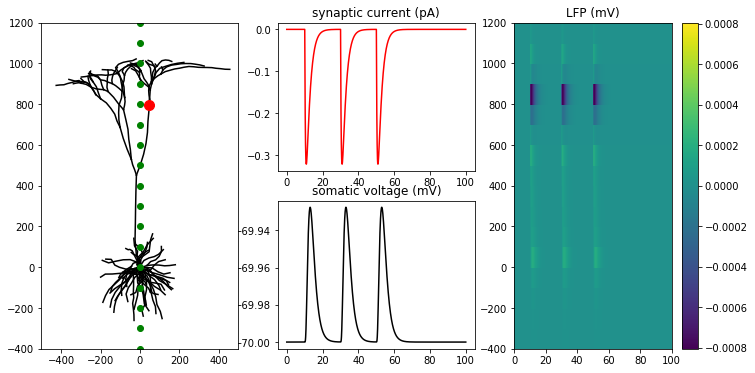

In [6]:
figure(figsize=(12, 6))
subplot(133)
pcolormesh(cell.tvec, electrode.z, electrode.LFP,
           vmin=-abs(electrode.LFP).max(), vmax=abs(electrode.LFP).max())
colorbar()
title('LFP (mV)')

subplot(232)
plot(cell.tvec, synapse.i, 'r'), title('synaptic current (pA)')

subplot(235)
plot(cell.tvec, cell.somav, 'k'), title('somatic voltage (mV)')

subplot(131)
for sec in LFPy.cell.neuron.h.allsec():
    idx = cell.get_idx(sec.name())
    plot(np.r_[cell.xstart[idx], cell.xend[idx][-1]],
            np.r_[cell.zstart[idx], cell.zend[idx][-1]],
            color='k')
plot([cell.synapses[0].x], [cell.synapses[0].z], 
     color='r', marker='o', markersize=10)
plot(electrode.x, electrode.z, '.', marker='o', color='g')
axis([-500, 500, -400, 1200])

#savefig('LFPy-example-2.pdf', dpi=300)